In [1]:
# Importing packages

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


In [2]:
#Reading Dataset
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
print('Training data shape:', df_train.shape)

Training data shape: (1460, 81)


In [5]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

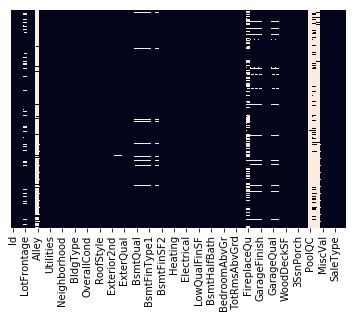

In [6]:
#Heatmap for NULL values
sns.heatmap(df_train.isnull(), yticklabels= False, cbar=False)

In [7]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [8]:
main_df = df_train
columns = df_train.columns

In [9]:
# Dropping columns which have more than half of its as NULL values
for column in columns:
    if df_train[column].isnull().sum()>730:
        df_train.drop([column], axis =1, inplace=True)

In [10]:
df_train.shape

(1460, 77)

In [11]:
# Craeting a dataframe of only categorical type data

object_df = df_train.select_dtypes(include = ['object'])
object_df.shape

(1460, 39)

In [12]:
# Storing categorical type feature names
columns_ob = object_df.columns
columns_ob

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
# Replacing all the categorical type column's NULL values with the mode of the particular column
for column in columns_ob:
    if df_train[column].isnull().sum()>0:
        df_train[column]= df_train[column].fillna(df_train[column].mode()[0])

In [14]:
# Craeting a dataframe of only 'int64' and 'float64' data type

int_df= df_train.select_dtypes(include =['int64', 'float64'])
int_df.shape

(1460, 38)

In [15]:
columns_int = int_df.columns
columns_int

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
# Replacing all the 'int64' and'float64' data type column's NULL values with the mode of the particular column

for column in columns_int:
    if df_train[column].isnull().sum()>0:
        df_train[column]= df_train[column].fillna(df_train[column].mean())

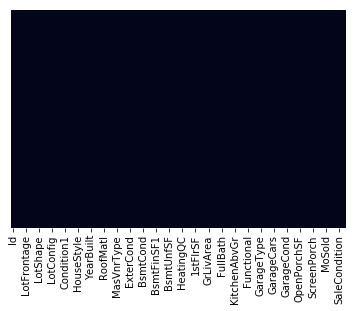

In [17]:
#Heat map after dealing with NULL values

sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False)

In [18]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 77 columns]

In [19]:
main_df = df_train

In [20]:
# Y train dataset

Y_train = df_train['SalePrice']
df_train.drop(['SalePrice'],axis=1, inplace=True)

In [21]:
# Retrieving processed test data 

%store -r df_test

In [22]:
# Concatinating train and test datasets (row wise)

X_df = pd.concat([df_train, df_test], axis=0, ignore_index=True, sort=False)
print(X_df.shape)
X_df.head()

(2919, 76)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside  ...          61             0         0           0   
1    AllPub       FR2  ...           0             0         0           0   
2    AllPub    Inside  ...          42             0         0           0   
3    AllPub    Corner  ...          35           272         0           0   
4    AllPub       FR2  ...          84             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0        0       0       2    2008        WD         Normal  
1        0       0       5    2007        WD         Normal  
2        0       0       9    2008        WD         Normal  
3        0       0       2    2006        WD        Abnorml  
4        0       0      12    2008        WD         Normal  

[5 rows x 76 columns]

In [23]:
# Types of categories in the categorical column of the dataset

X_columns_ob = X_df.select_dtypes(include = ['object']).columns
for column in X_columns_ob:
    print(X_df[column].value_counts())


RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64
Pave    2907
Grvl      12
Name: Street, dtype: int64
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64
AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64
Norm      2511
Feedr      164
Artery 

In [24]:
X_df.shape

(2919, 76)

In [25]:
# Function for One Hot Encoding Method
def one_hot_encode(columns):
    i=0
    df_final = X_df
    for column in columns:
        # Creating dummies
        df1 = pd.get_dummies(X_df[column], drop_first=True)
        X_df.drop([column], axis=1, inplace=True) 
        if i==0:
            df_final = df1.copy()
        else:
            df_final = pd.concat([df_final,df1],axis=1,sort=False)
        i+=1
    df_final = pd.concat([X_df,df_final],axis=1,sort=False)
    return df_final

In [26]:
final_df = one_hot_encode(columns_ob)
final_df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  ConLI  ConLw  New  Oth  WD  \
0          2003       196.0       706.0  ...      0      0    0    0   1   
1          1976         0.0       978.0  ...      0      0    0    0   1   
2          2002       162.0       486.0  ...      0      0    0    0   1   
3          1970         0.0       216.0  ...      0      0    0    0   1   
4          2000       350.0       655.0  ...      0      0    0    0   1   

   AdjLand  Alloca  Family  Normal  Partial  
0        0       0       0       1        0  
1        0       0       0       1        0  
2        0       0       0       1        0  
3        0       0       0       0        0  
4        0       0       0       1        0  

[5 rows x 237 columns]

In [27]:
final_df.shape

(2919, 237)

In [28]:
# Removing duplicates column

final_df =final_df.loc[:,~final_df.columns.duplicated()]
final_df.shape

(2919, 177)

In [29]:
Y_train.shape

(1460,)

In [30]:
# Creating X train dataset

X_train = final_df.iloc[:1460,:]
X_test = final_df.iloc[1460:,:]
X_train.shape

(1460, 177)

In [31]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [32]:
predictions = model.predict(X_test)
predictions

array([129097.91, 155417.  , 180735.8 , ..., 156248.59, 116021.  ,
       228986.68])

In [33]:
duplicate_columns = X_train.columns[X_train.columns.duplicated()]
duplicate_columns


Index([], dtype='object')

In [38]:
import xgboost as xgb

regressor=xgb.XGBRegressor()
       
hyper_para = {
        'n_estimators': [10, 50,100,300,500,700,1000,1500],
        'max_depth': [2, 4 ,5 , 7, 9, 15],
        'learning_rate': [0.001,0.02,0.15,0.1,0.015],
        'min_child_weight': [1, 1.5, 1.75, 2.25, 3, 3.5,],
        'base_score': [0.2, 0.6, 0.75, 1]
}

In [39]:
from sklearn.model_selection import RandomizedSearchCV
r_cv = RandomizedSearchCV(estimator = regressor,  param_distributions= hyper_para, 
                         cv=6, n_iter=90, scoring = 'neg_mean_absolute_error',
                         n_jobs=4, verbose=5 , return_train_score=True,
                         random_state=50)

In [40]:
r_cv.fit(X_train,Y_train)

Fitting 6 folds for each of 90 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   35.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  9.7min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 13.6min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed: 17.8min finished


RandomizedSearchCV(cv=6, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
          fit_params=None, iid='warn', n_iter=90, n_jobs=4,
          param_distributions={'n_estimators': [10, 50, 100, 300, 500, 700, 1000, 1500], 'max_depth': [2, 4, 5, 7, 9, 15], 'learning_rate': [0.001, 0.02, 0.15, 0.1, 0.015], 'min_child_weight': [1, 1.5, 1.75, 2.25, 3, 3.5], 'base_score': [0.2, 0.6, 0.75, 1]},
          pre_dispatch='2*n_jobs', random_state=50, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=5)

In [41]:
r_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.015, max_delta_step=0, max_depth=4,
       min_child_weight=1.75, missing=nan, monotone_constraints='()',
       n_estimators=1500, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [47]:
regressor = xgb.XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.015, max_delta_step=0, max_depth=4,
       min_child_weight=1.75, missing=None, monotone_constraints='()',
       n_estimators=1500, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [48]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.015, max_delta_step=0, max_depth=4,
       min_child_weight=1.75, missing=None, monotone_constraints='()',
       n_estimators=1500, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [49]:
xgb_predictions = regressor.predict(X_test)
xgb_predictions

array([127094.13, 154379.62, 184688.39, ..., 174711.3 , 116685.45,
       228043.92], dtype=float32)

In [50]:
pred = pd.DataFrame(xgb_predictions)
sub_df = pd.read_csv('sample_submission.csv')
dataset = pd.concat([sub_df['Id'],pred], axis=1)
dataset.columns = ['Id', 'SalePrice']
dataset.to_csv('sample_submission.csv', index=False)